# Fake News Classification - Data Exploration

## Project Overview
- **Task**: Binary classification of fake (0) vs real (1) news articles
- **Training Data**: `training_data_lowercase.csv` (34,151 articles)
- **Test Data**: `testing_data_lowercase_nolabels.csv` (9,983 articles)
- **Team**: JD, Mercy, Michael

## 1. Import Libraries
Loading necessary libraries for data exploration and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Datasets
Loading both training and test datasets to understand their structure.

In [2]:
# Load training data
train_df = pd.read_csv('data/training_data_lowercase.csv')
print(f"Training data shape: {train_df.shape}")
print(f"Training data columns: {train_df.columns.tolist()}")
print("\nFirst few rows of training data:")
print(train_df.head())

Training data shape: (34151, 1)
Training data columns: ['0\tdonald trump sends out embarrassing new year‚s eve message; this is disturbing']

First few rows of training data:
  0\tdonald trump sends out embarrassing new year‚s eve message; this is disturbing
0  0\tdrunk bragging trump staffer started russia...                               
1  0\tsheriff david clarke becomes an internet jo...                               
2  0\ttrump is so obsessed he even has obama‚s na...                               
3  0\tpope francis just called out donald trump d...                               
4  0\tracist alabama cops brutalize black boy whi...                               


In [3]:
# Load test data
test_df = pd.read_csv('data/testing_data_lowercase_nolabels.csv')
print(f"Test data shape: {test_df.shape}")
print(f"Test data columns: {test_df.columns.tolist()}")
print("\nFirst few rows of test data:")
print(test_df.head())

Test data shape: (9983, 1)
Test data columns: ['2\tcopycat muslim terrorist arrested with assault weapons']

First few rows of test data:
  2\tcopycat muslim terrorist arrested with assault weapons
0  2\twow! chicago protester caught on camera adm...       
1  2\tgermany's fdp look to fill schaeuble's big ...       
2  2\tmi school sends welcome back packet warning...       
3  2\tu.n. seeks 'massive' aid boost amid rohingy...       
4  2\tdid oprah just leave ‚nasty‚ hillary wishin...       


## 3. Data Structure Analysis
Understanding the format and structure of our datasets.

In [4]:
# Check data info
print("=== TRAINING DATA INFO ===")
print(train_df.info())
print("\n=== TEST DATA INFO ===")
print(test_df.info())

=== TRAINING DATA INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34151 entries, 0 to 34150
Data columns (total 1 columns):
 #   Column                                                                            Non-Null Count  Dtype 
---  ------                                                                            --------------  ----- 
 0   0	donald trump sends out embarrassing new year‚s eve message; this is disturbing  34151 non-null  object
dtypes: object(1)
memory usage: 266.9+ KB
None

=== TEST DATA INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9983 entries, 0 to 9982
Data columns (total 1 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   2	copycat muslim terrorist arrested with assault weapons  9983 non-null   object
dtypes: object(1)
memory usage: 78.1+ KB
None


In [5]:
# Check for missing values
print("=== MISSING VALUES ===")
print("Training data missing values:")
print(train_df.isnull().sum())
print("\nTest data missing values:")
print(test_df.isnull().sum())

=== MISSING VALUES ===
Training data missing values:
0\tdonald trump sends out embarrassing new year‚s eve message; this is disturbing    0
dtype: int64

Test data missing values:
2\tcopycat muslim terrorist arrested with assault weapons    0
dtype: int64


In [6]:
# Check for duplicates
print("=== DUPLICATE CHECK ===")
print(f"Training data duplicates: {train_df.duplicated().sum()}")
print(f"Test data duplicates: {test_df.duplicated().sum()}")

=== DUPLICATE CHECK ===
Training data duplicates: 1946
Test data duplicates: 775


## 4. Parse Data Format
The data appears to be in a specific format. Let's extract labels and text properly.

In [7]:
# Extract label and text from training data
# Assuming format is "label\ttext" or similar
first_col = train_df.columns[0]
print(f"First column name: '{first_col}'")
print(f"Sample values:")
for i in range(5):
    print(f"Row {i}: {repr(train_df.iloc[i, 0])}")

First column name: '0	donald trump sends out embarrassing new year‚s eve message; this is disturbing'
Sample values:
Row 0: '0\tdrunk bragging trump staffer started russian collusion investigation'
Row 1: '0\tsheriff david clarke becomes an internet joke for threatening to poke people ‚in the eye‚'
Row 2: '0\ttrump is so obsessed he even has obama‚s name coded into his website (images)'
Row 3: '0\tpope francis just called out donald trump during his christmas speech'
Row 4: '0\tracist alabama cops brutalize black boy while he is in handcuffs (graphic images)'


In [8]:
# Parse training data (adjust based on actual format)
def parse_training_data(df):
    parsed_data = []
    col_name = df.columns[0]
    
    for idx, row in df.iterrows():
        text = str(row[col_name])
        
        # Try to extract label (assuming it's at the beginning)
        if text.startswith('0\t') or text.startswith('1\t'):
            label = int(text[0])
            content = text[2:]  # Skip label and tab
        elif text.startswith('0 ') or text.startswith('1 '):
            label = int(text[0])
            content = text[2:]  # Skip label and space
        else:
            # If no clear label, try to find digit at start
            match = re.match(r'^(\d+)\s+(.+)', text)
            if match:
                label = int(match.group(1))
                content = match.group(2)
            else:
                label = None
                content = text
        
        parsed_data.append({'label': label, 'text': content})
    
    return pd.DataFrame(parsed_data)

# Parse the training data
train_parsed = parse_training_data(train_df)
print(f"Parsed training data shape: {train_parsed.shape}")
print("\nFirst few parsed rows:")
print(train_parsed.head())

Parsed training data shape: (34151, 2)

First few parsed rows:
   label                                               text
0      0  drunk bragging trump staffer started russian c...
1      0  sheriff david clarke becomes an internet joke ...
2      0  trump is so obsessed he even has obama‚s name ...
3      0  pope francis just called out donald trump duri...
4      0  racist alabama cops brutalize black boy while ...


In [9]:
# Parse test data similarly
def parse_test_data(df):
    parsed_data = []
    col_name = df.columns[0]
    
    for idx, row in df.iterrows():
        text = str(row[col_name])
        
        # Remove any leading numbers that might be indices
        match = re.match(r'^\d+\s+(.+)', text)
        if match:
            content = match.group(1)
        else:
            content = text
        
        parsed_data.append({'text': content})
    
    return pd.DataFrame(parsed_data)

# Parse the test data
test_parsed = parse_test_data(test_df)
print(f"Parsed test data shape: {test_parsed.shape}")
print("\nFirst few parsed rows:")
print(test_parsed.head())

Parsed test data shape: (9983, 1)

First few parsed rows:
                                                text
0  wow! chicago protester caught on camera admits...
1   germany's fdp look to fill schaeuble's big shoes
2  mi school sends welcome back packet warning ki...
3  u.n. seeks 'massive' aid boost amid rohingya '...
4  did oprah just leave ‚nasty‚ hillary wishing s...


## 5. Label Distribution Analysis
Understanding the balance between fake (0) and real (1) news in our training data.

Label distribution:
label
0    17571
1    16580
Name: count, dtype: int64

Percentage distribution:
label
0    51.450909
1    48.549091
Name: proportion, dtype: float64


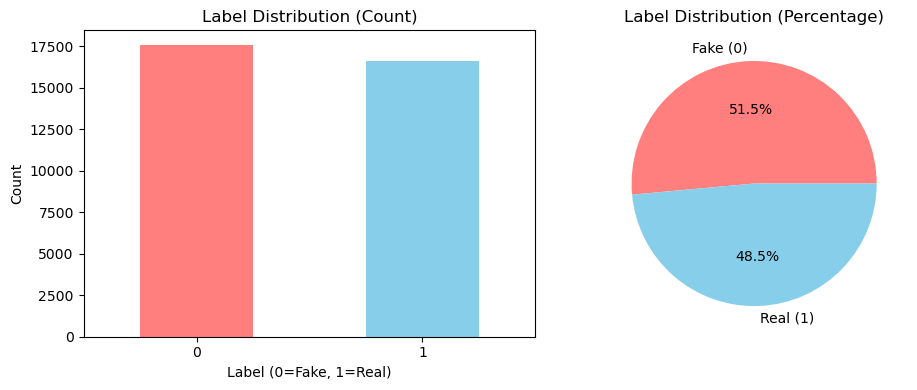

In [10]:
# Check label distribution
if 'label' in train_parsed.columns:
    label_counts = train_parsed['label'].value_counts().sort_index()
    print("Label distribution:")
    print(label_counts)
    print(f"\nPercentage distribution:")
    print(train_parsed['label'].value_counts(normalize=True).sort_index() * 100)
    
    # Visualize label distribution
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    colors = ['#ff7f7f', '#87ceeb']  # Light red for fake, light blue for real
    label_counts.plot(kind='bar', color=colors)
    plt.title('Label Distribution (Count)')
    plt.xlabel('Label (0=Fake, 1=Real)')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    
    plt.subplot(1, 2, 2)
    plt.pie(label_counts.values, labels=['Fake (0)', 'Real (1)'], autopct='%1.1f%%', colors=colors)
    plt.title('Label Distribution (Percentage)')
    
    plt.tight_layout()
    plt.show()
else:
    print("No label column found in parsed data. Check parsing logic.")

## 6. Text Length Analysis
Analyzing the length characteristics of news articles.

In [11]:
# Calculate text lengths
train_parsed['text_length'] = train_parsed['text'].str.len()
train_parsed['word_count'] = train_parsed['text'].str.split().str.len()

test_parsed['text_length'] = test_parsed['text'].str.len()
test_parsed['word_count'] = test_parsed['text'].str.split().str.len()

print("=== TEXT LENGTH STATISTICS ===")
print("Training data:")
print(train_parsed[['text_length', 'word_count']].describe())
print("\nTest data:")
print(test_parsed[['text_length', 'word_count']].describe())

=== TEXT LENGTH STATISTICS ===
Training data:
        text_length    word_count
count  34151.000000  34151.000000
mean      74.908670     11.691136
std       23.407283      3.841585
min        2.000000      1.000000
25%       61.000000      9.000000
50%       70.000000     11.000000
75%       85.000000     14.000000
max      279.000000     42.000000

Test data:
       text_length   word_count
count  9983.000000  9983.000000
mean     76.707202    11.901933
std      28.103547     4.399334
min       3.000000     1.000000
25%      60.000000     9.000000
50%      70.000000    11.000000
75%      88.000000    14.000000
max     249.000000    42.000000


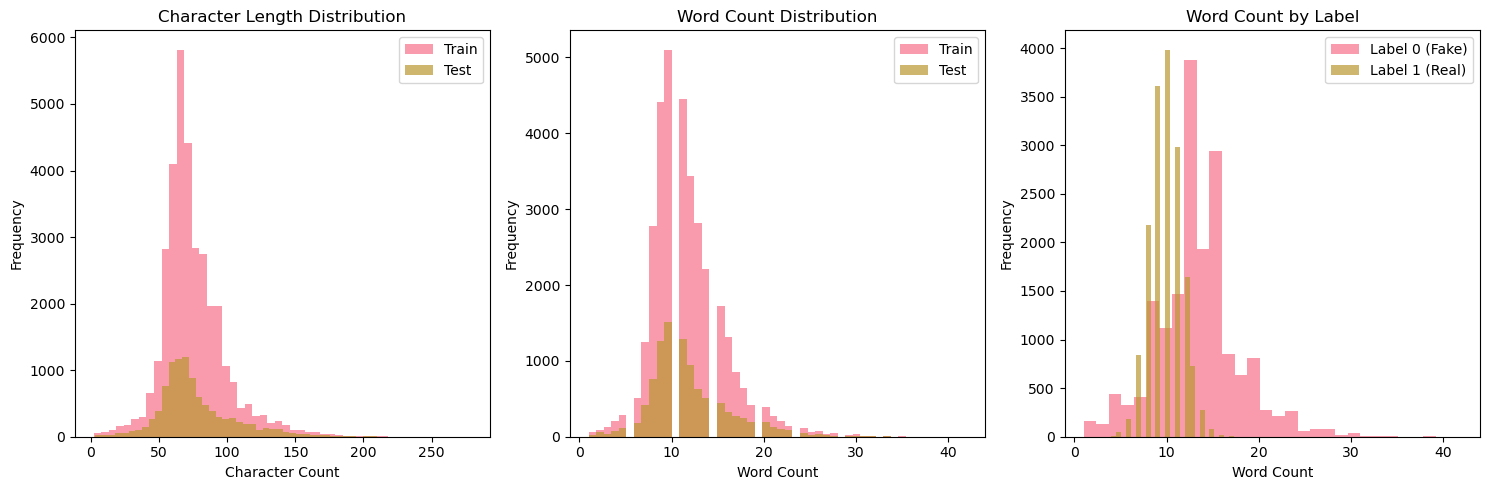

In [12]:
# Visualize text lengths
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(train_parsed['text_length'], bins=50, alpha=0.7, label='Train')
plt.hist(test_parsed['text_length'], bins=50, alpha=0.7, label='Test')
plt.title('Character Length Distribution')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(train_parsed['word_count'], bins=50, alpha=0.7, label='Train')
plt.hist(test_parsed['word_count'], bins=50, alpha=0.7, label='Test')
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()

# Text length by label (if available)
plt.subplot(1, 3, 3)
if 'label' in train_parsed.columns:
    for label in train_parsed['label'].unique():
        if pd.notna(label):
            subset = train_parsed[train_parsed['label'] == label]
            plt.hist(subset['word_count'], bins=30, alpha=0.7, 
                    label=f'Label {int(label)} ({"Fake" if label == 0 else "Real"})')
    plt.title('Word Count by Label')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.legend()
else:
    plt.text(0.5, 0.5, 'No labels available', ha='center', va='center')
    plt.title('No Label Data')

plt.tight_layout()
plt.show()

## 7. Sample Text Analysis
Examining actual content to understand the nature of the data.

In [13]:
# Display sample texts
print("=== SAMPLE ARTICLES ===")
if 'label' in train_parsed.columns:
    # Show examples of each class
    for label in sorted(train_parsed['label'].unique()):
        if pd.notna(label):
            print(f"\n--- Label {int(label)} ({'Fake' if label == 0 else 'Real'}) Examples ---")
            samples = train_parsed[train_parsed['label'] == label].sample(n=3)
            for i, (idx, row) in enumerate(samples.iterrows()):
                print(f"\nExample {i+1} (Length: {len(row['text'])} chars):")
                print(row['text'][:300] + "..." if len(row['text']) > 300 else row['text'])
else:
    print("\n--- Random Training Examples ---")
    samples = train_parsed.sample(n=5)
    for i, (idx, row) in enumerate(samples.iterrows()):
        print(f"\nExample {i+1} (Length: {len(row['text'])} chars):")
        print(row['text'][:300] + "..." if len(row['text']) > 300 else row['text'])

=== SAMPLE ARTICLES ===

--- Label 0 (Fake) Examples ---

Example 1 (Length: 93 chars):
trump brings us dangerously close to state-run media before his administration is even chosen

Example 2 (Length: 90 chars):
planned parenthood tells carly fiorina to go f*ck herself on the way out the door (tweets)

Example 3 (Length: 102 chars):
morning joe shreds trump‚s racist elizabeth warren attacks: ‚what the hell‚s wrong with them?‚ (video)

--- Label 1 (Real) Examples ---

Example 1 (Length: 61 chars):
"mccain presses u.s. air force	pentagon over russian engines"

Example 2 (Length: 69 chars):
"wells fargo supports 'best-interest' standard	is reviewing new rule"

Example 3 (Length: 72 chars):
clinton camp says fbi should say what it knows about trump's russia ties


## 8. Text Preprocessing Preview
Basic text cleaning and preprocessing to understand what we're working with.

In [14]:
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def basic_preprocess(text):
    """Basic text preprocessing"""
    if pd.isna(text):
        return ""
    
    # Convert to lowercase (already done, but just in case)
    text = str(text).lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    return text

# Apply basic preprocessing to a sample
sample_text = train_parsed['text'].iloc[0]
print("Original text:")
print(sample_text)
print("\nPreprocessed text:")
print(basic_preprocess(sample_text))

Original text:
drunk bragging trump staffer started russian collusion investigation

Preprocessed text:
drunk bragging trump staffer started russian collusion investigation


## 9. Word Frequency Analysis
Understanding the most common words in our dataset.

In [15]:
# Get word frequencies
def get_word_frequencies(texts, n_top=20):
    """Get top word frequencies from a list of texts"""
    all_words = []
    for text in texts:
        if pd.notna(text):
            words = basic_preprocess(text).split()
            # Filter out stop words and short words
            words = [w for w in words if w not in ENGLISH_STOP_WORDS and len(w) > 2]
            all_words.extend(words)
    
    return Counter(all_words).most_common(n_top)

# Get overall word frequencies
top_words = get_word_frequencies(train_parsed['text'], n_top=30)
print("=== TOP 30 WORDS IN TRAINING DATA ===")
for word, count in top_words:
    print(f"{word}: {count}")

=== TOP 30 WORDS IN TRAINING DATA ===
trump: 10254
video: 5501
says: 2614
obama: 1848
house: 1794
white: 1302
clinton: 1287
new: 1265
just: 1246
trump‚s: 1238
hillary: 1201
president: 1089
republican: 1008
russia: 873
senate: 853
court: 773
state: 744
donald: 739
republicans: 721
tax: 707
gop: 663
trumps: 658
breaking: 651
north: 636
news: 632
election: 624
calls: 622
campaign: 613
vote: 561
watch: 545


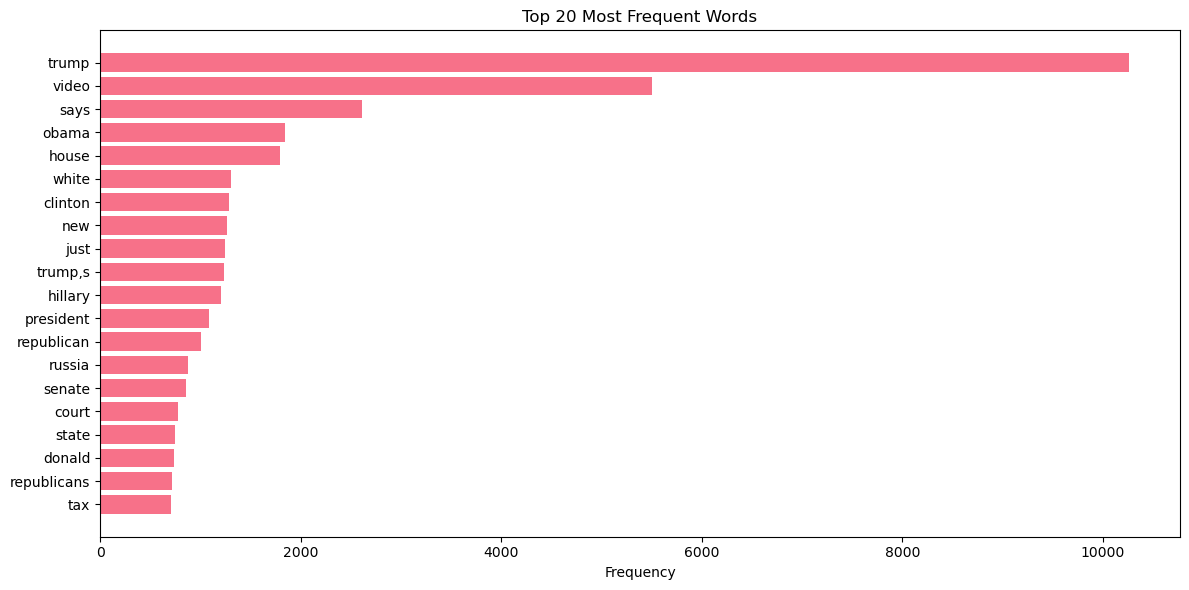

In [16]:
# Visualize word frequencies
if top_words:
    words, counts = zip(*top_words[:20])
    
    plt.figure(figsize=(12, 6))
    plt.barh(range(len(words)), counts)
    plt.yticks(range(len(words)), words)
    plt.xlabel('Frequency')
    plt.title('Top 20 Most Frequent Words')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

## 10. Word Frequencies by Label
Comparing word usage between fake and real news.

=== TOP WORDS IN FAKE NEWS ===
trump: 5751
video: 5473
obama: 1268
trump‚s: 1231
just: 1229
hillary: 1156
president: 738
clinton: 685
donald: 681
gop: 655
breaking: 646
new: 604
watch: 527
news: 526
white: 518

=== TOP WORDS IN REAL NEWS ===
trump: 4503
says: 2266
house: 1399
white: 784
senate: 720
new: 661
russia: 659
trumps: 651
republican: 630
clinton: 602
tax: 590
court: 585
obama: 580
north: 554
korea: 475


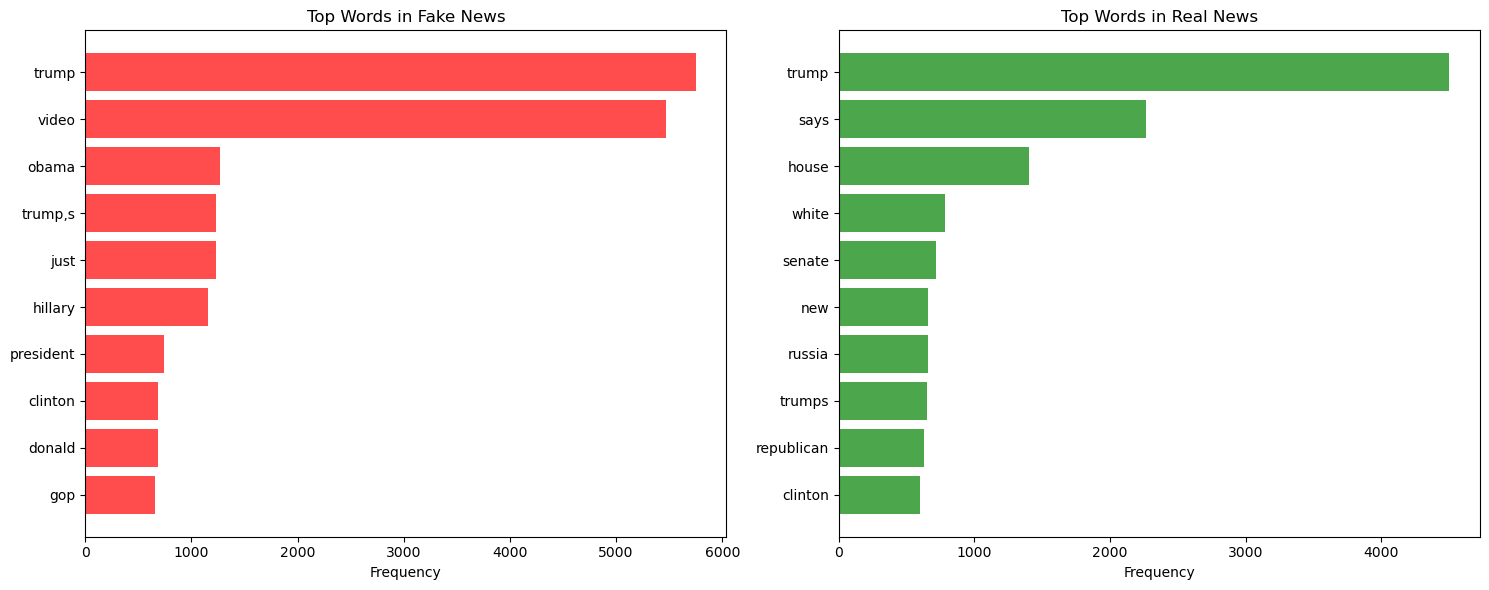

In [17]:
# Compare word frequencies by label
if 'label' in train_parsed.columns:
    fake_news = train_parsed[train_parsed['label'] == 0]['text']
    real_news = train_parsed[train_parsed['label'] == 1]['text']
    
    print("=== TOP WORDS IN FAKE NEWS ===")
    fake_words = get_word_frequencies(fake_news, n_top=15)
    for word, count in fake_words:
        print(f"{word}: {count}")
    
    print("\n=== TOP WORDS IN REAL NEWS ===")
    real_words = get_word_frequencies(real_news, n_top=15)
    for word, count in real_words:
        print(f"{word}: {count}")
    
    # Visualize comparison
    if fake_words and real_words:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Fake news words
        words_fake, counts_fake = zip(*fake_words[:10])
        ax1.barh(range(len(words_fake)), counts_fake, color='red', alpha=0.7)
        ax1.set_yticks(range(len(words_fake)))
        ax1.set_yticklabels(words_fake)
        ax1.set_xlabel('Frequency')
        ax1.set_title('Top Words in Fake News')
        ax1.invert_yaxis()
        
        # Real news words
        words_real, counts_real = zip(*real_words[:10])
        ax2.barh(range(len(words_real)), counts_real, color='green', alpha=0.7)
        ax2.set_yticks(range(len(words_real)))
        ax2.set_yticklabels(words_real)
        ax2.set_xlabel('Frequency')
        ax2.set_title('Top Words in Real News')
        ax2.invert_yaxis()
        
        plt.tight_layout()
        plt.show()

## Data Summary & Next Steps
Summary of findings and recommendations for modeling.

In [18]:
print("=== DATA EXPLORATION SUMMARY ===")
print(f"Training samples: {len(train_parsed)}")
print(f"Test samples: {len(test_parsed)}")

if 'label' in train_parsed.columns:
    label_dist = train_parsed['label'].value_counts(normalize=True)
    print(f"\nLabel distribution:")
    for label, pct in label_dist.items():
        if pd.notna(label):
            print(f"  Label {int(label)} ({'Fake' if label == 0 else 'Real'}): {pct:.1%}")

print(f"\nAverage text length: {train_parsed['text_length'].mean():.0f} characters")
print(f"Average word count: {train_parsed['word_count'].mean():.0f} words")

print("\n=== RECOMMENDATIONS FOR MODELING ===")
print("1. Data appears to be ready for text classification")
print("2. Consider text length as a potential feature")
print("3. Start with TF-IDF + Logistic Regression as baseline")
print("4. Text preprocessing: lowercase, remove punctuation, remove stop words")
print("5. Consider word frequency differences between fake/real news")

if 'label' in train_parsed.columns and train_parsed['label'].value_counts().min() / len(train_parsed) < 0.3:
    print("6. ⚠️  Dataset may be imbalanced - consider this in model evaluation")
else:
    print("6. ✓ Dataset appears reasonably balanced")

=== DATA EXPLORATION SUMMARY ===
Training samples: 34151
Test samples: 9983

Label distribution:
  Label 0 (Fake): 51.5%
  Label 1 (Real): 48.5%

Average text length: 75 characters
Average word count: 12 words

=== RECOMMENDATIONS FOR MODELING ===
1. Data appears to be ready for text classification
2. Consider text length as a potential feature
3. Start with TF-IDF + Logistic Regression as baseline
4. Text preprocessing: lowercase, remove punctuation, remove stop words
5. Consider word frequency differences between fake/real news
6. ✓ Dataset appears reasonably balanced
